# M06 Notes

## New Edition of Pandas Book

There is a new edition of the book we are using for NumPy and Pandas:

- [Python for Data Analysis, 3E](https://wesmckinney.com/book/pandas-basics)

Shout to Daniel Stornetta!

## NumPy Slices

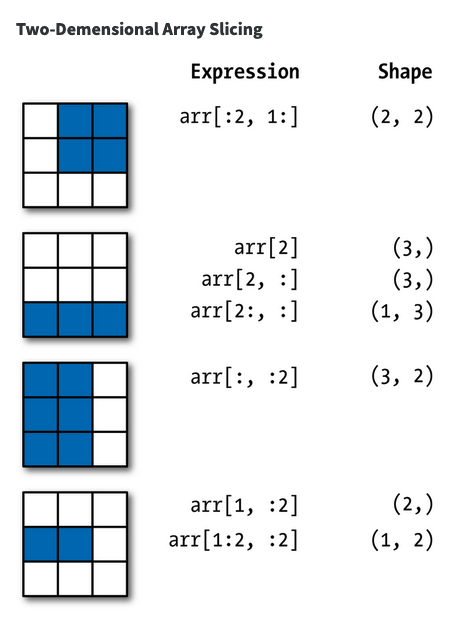

In [1]:
import numpy as np

In [2]:
def inspect(a):
    print('Structure:')
    print(a)
    print('Shape:', a.shape, 'Axes:', len(a.shape))

In [3]:
a1 = np.random.randn(3,3)

In [4]:
inspect(a1)

Structure:
[[-0.00462874  0.68627847 -2.23444565]
 [ 0.4729947   0.61797039  0.09570946]
 [-0.60758386 -2.84371596  1.15749854]]
Shape: (3, 3) Axes: 2


In [5]:
inspect(a1[2])

Structure:
[-0.60758386 -2.84371596  1.15749854]
Shape: (3,) Axes: 1


In [6]:
inspect(a1[2, :])

Structure:
[-0.60758386 -2.84371596  1.15749854]
Shape: (3,) Axes: 1


In [7]:
inspect(a1[2:])

Structure:
[[-0.60758386 -2.84371596  1.15749854]]
Shape: (1, 3) Axes: 2


In [8]:
inspect(a1[[2]])

Structure:
[[-0.60758386 -2.84371596  1.15749854]]
Shape: (1, 3) Axes: 2


In [9]:
inspect(a1[[2], :])

Structure:
[[-0.60758386 -2.84371596  1.15749854]]
Shape: (1, 3) Axes: 2


In [10]:
inspect(a1[2:, :])

Structure:
[[-0.60758386 -2.84371596  1.15749854]]
Shape: (1, 3) Axes: 2


In [11]:
inspect(a1[2, 2])

Structure:
1.1574985440672065
Shape: () Axes: 0


In [12]:
inspect(a1[2, [2]])

Structure:
[1.15749854]
Shape: (1,) Axes: 1


In [13]:
inspect(a1[[2], 2])

Structure:
[1.15749854]
Shape: (1,) Axes: 1


In [14]:
inspect(a1[[2], [2]])

Structure:
[1.15749854]
Shape: (1,) Axes: 1


In [15]:
inspect(a1[2:, 2:])

Structure:
[[1.15749854]]
Shape: (1, 1) Axes: 2


In [16]:
inspect(a1[:, 2])

Structure:
[-2.23444565  0.09570946  1.15749854]
Shape: (3,) Axes: 1


In [17]:
inspect(a1[:, [2]])

Structure:
[[-2.23444565]
 [ 0.09570946]
 [ 1.15749854]]
Shape: (3, 1) Axes: 2


In [18]:
inspect(a1[:, 1:])

Structure:
[[ 0.68627847 -2.23444565]
 [ 0.61797039  0.09570946]
 [-2.84371596  1.15749854]]
Shape: (3, 2) Axes: 2


## Pandas 

- Pandas assumes a 2D world.
- Use [Xarray](https://docs.xarray.dev/en/stable/index.html) for more dimensions ...
- Pandas is _lingua franca_

## Pandas Indexing

In [19]:
import pandas as pd

### `-1`

In [20]:
ser = pd.Series(np.arange(3.))

In [21]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [22]:
# ser[-1] # Throws an error

In [23]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])

In [24]:
ser2

a    0.0
b    1.0
c    2.0
dtype: float64

In [25]:
ser2[-1]

2.0

### Arithmetic

Series operations work with indexes implicitly.

In [27]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

In [28]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [29]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [30]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

Dataframes 

In [117]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'), index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [118]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [119]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [120]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [124]:
(df1 + df2).fillna(0).style.background_gradient(axis=None, cmap='YlGnBu')

,b,c,d,e
Colorado,0.000000,0.000000,0.000000,0.000000
Ohio,3.000000,0.000000,6.000000,0.000000
Oregon,0.000000,0.000000,0.000000,0.000000
Texas,9.000000,0.000000,12.000000,0.000000
Utah,0.000000,0.000000,0.000000,0.000000


## Anatomy of a Data Frame

<img src="https://pynative.com/wp-content/uploads/2021/02/dataframe.png" width="50%" height="50%"/>

<img src="https://miro.medium.com/max/700/1*KOBhtOeFntu6CyJUsCdN0g.jpeg" width="50%" height="50%"/>

In [97]:
import seaborn as sns

In [101]:
# sns.get_dataset_names()

In [176]:
data_set = 'iris'
# data_set = 'penguins'
df = sns.load_dataset(data_set)
df.index.name = 'obs_id'

In [177]:
# df = pd.read_csv("iris_data.csv").set_index('obs_id')

In [178]:
df.groupby('species').agg(['mean', 'median', 'count'])

sepal_length              sepal_width              petal_length  \
                   mean median count        mean median count         mean   
species                                                                      
setosa            5.006    5.0    50       3.428    3.4    50        1.462   
versicolor        5.936    5.9    50       2.770    2.8    50        4.260   
virginica         6.588    6.5    50       2.974    3.0    50        5.552   

                        petal_width               
           median count        mean median count  
species                                           
setosa       1.50    50       0.246    0.2    50  
versicolor   4.35    50       1.326    1.3    50  
virginica    5.55    50       2.026    2.0    50

In [149]:
df['species'].value_counts().to_frame('n')

,n
species,
setosa,50
versicolor,50
virginica,50


In [182]:
# df.values